This notebook introduces the problem addressed in this paper:

 - localizating an object in a large image
 - foveation
 - action (saccade)
 

In [1]:
figname = '../paper/fig_result'

In [2]:
%run 0_parameters.ipynb


This notebook introduces the problem addressed in this paper:

 - localizating an object in a large image
 - foveation
 - action (saccade)
       
      
2019-03-15
{'w': 28, 'minibatch_size': 100, 'train_batch_size': 60000, 'test_batch_size': 20, 'noise_batch_size': 1000, 'mean': 0.1307, 'std': 0.3081, 'N_pic': 128, 'offset_std': 30, 'offset_max': 35, 'noise': 1.0, 'contrast': 0.8, 'sf_0': 0.2, 'B_sf': 0.3, 'N_theta': 6, 'N_azimuth': 16, 'N_eccentricity': 10, 'N_phase': 2, 'N_X': 128, 'N_Y': 128, 'rho': 1.41, 'bias_deconv': True, 'p_dropout': 0.5, 'dim1': 1000, 'dim2': 1000, 'loss_func': BCEWithLogitsLoss(), 'lr': 0.01, 'do_adam': True, 'epochs': 80, 'bn1_bn_momentum': 0.0, 'bn2_bn_momentum': 0.0, 'momentum': 0.1, 'n_epochs': 10, 'num_processes': 1, 'no_cuda': True, 'log_interval': 100, 'verbose': 1, 'filename': '../data/2019-03-15', 'seed': 2019}
Overwriting train.py
2019-03-15T12:11:54+01:00

CPython 3.7.2
IPython 7.3.0

numpy 1.16.2
matplotlib 3.0.2
torch 1.0.1.post2

compiler   :

In [3]:
from what import WhatNet
model_path = "../data/MNIST_cnn.pt"
What_model = torch.load(model_path)

# Network

In [4]:
from retina import Display
d = Display(args)

from retina import Retina
r = Retina(args)

from where import Where
where = Where(args, d, r)

filename_train = args.filename + '_train.pt'
filename_train = "../data/2019-03-14_train4.pt"
%ls -lh {filename_train}
#%rm {filename_train}

Loading accuracy... min, max= 0.0145 0.9852
-rw-r--r--  1 laurentperrinet  staff    12M Mar 14 19:28 ../data/2019-03-14_train4.pt


In [5]:
print(filename_train)

../data/2019-03-14_train4.pt


In [6]:
%prun  -l 50 -s cumulative where.train(filename_train)

Loading file ../data/2019-03-14_train4.pt
 

/usr/local/lib/python3.7/site-packages/torch/serialization.py:435: SourceChangeWarning: source code of class 'where.WhereNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


         12937 function calls (12901 primitive calls) in 0.024 seconds

   Ordered by: cumulative time
   List reduced from 205 to 50 due to restriction <50>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.024    0.024 {built-in method builtins.exec}
        1    0.000    0.000    0.024    0.024 <string>:1(<module>)
        1    0.000    0.000    0.024    0.024 where.py:155(train)
        1    0.000    0.000    0.024    0.024 serialization.py:301(load)
        1    0.000    0.000    0.024    0.024 serialization.py:374(_load)
        1    0.001    0.001    0.013    0.013 {method 'load' of '_pickle.Unpickler' objects}
       20    0.000    0.000    0.011    0.001 serialization.py:491(persistent_load)
        4    0.000    0.000    0.011    0.003 serialization.py:396(_check_container_source)
        4    0.000    0.000    0.010    0.002 inspect.py:967(getsource)
        4    0.000    0.000    0.010    0.002 inspect.py:946(getsource

## Anywhere target, with noise

# Visualisation of some examples

In [7]:
idx_start, idx_stop = 0, 11

In [8]:
%prun  -l 50 -s cumulative data, label = next(iter(d.loader_test))


         1606 function calls (1601 primitive calls) in 0.004 seconds

   Ordered by: cumulative time
   List reduced from 75 to 50 due to restriction <50>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.004    0.004 {built-in method builtins.exec}
        1    0.000    0.000    0.004    0.004 <string>:1(<module>)
      2/1    0.000    0.000    0.004    0.004 {built-in method builtins.next}
        1    0.000    0.000    0.004    0.004 dataloader.py:612(__next__)
        1    0.000    0.000    0.003    0.003 dataloader.py:615(<listcomp>)
       20    0.000    0.000    0.003    0.000 mnist.py:80(__getitem__)
       20    0.000    0.000    0.002    0.000 transforms.py:58(__call__)
       20    0.000    0.000    0.001    0.000 transforms.py:83(__call__)
       20    0.000    0.000    0.001    0.000 functional.py:38(to_tensor)
       20    0.000    0.000    0.001    0.000 transforms.py:155(__call__)
        2    0.000    0.000    0.0

In [9]:
data.shape

torch.Size([20, 1, 28, 28])

In [10]:
%prun  -l 50 -s cumulative full, retina_data, accuracy_colliculus = where.minibatch(data)

         5147 function calls in 0.176 seconds

   Ordered by: cumulative time
   List reduced from 87 to 50 due to restriction <50>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.176    0.176 {built-in method builtins.exec}
        1    0.000    0.000    0.176    0.176 <string>:1(<module>)
        1    0.002    0.002    0.176    0.176 where.py:80(minibatch)
       20    0.122    0.006    0.146    0.007 retina.py:53(retina)
       20    0.002    0.000    0.023    0.001 SLIP.py:518(FTfilter)
       40    0.001    0.000    0.018    0.000 fftpack.py:652(_raw_fftnd)
       20    0.001    0.000    0.016    0.001 retina.py:208(draw)
       20    0.000    0.000    0.016    0.001 retina.py:198(place_object)
       80    0.000    0.000    0.014    0.000 fftpack.py:55(_raw_fft)
       20    0.006    0.000    0.013    0.001 retina.py:264(place_object)
       20    0.000    0.000    0.012    0.001 retina.py:67(accuracy_fullfield)
       20 

In [11]:
data.shape, retina_data.shape, accuracy_colliculus.shape

(torch.Size([20, 1, 28, 28]), torch.Size([20, 1920]), torch.Size([20, 160]))

In [12]:
retina_data


tensor([[ 0.0735, -0.0676, -0.1298,  ...,  0.0849,  0.6955, -1.0843],
        [-0.0945,  0.0674, -0.0276,  ...,  0.1577,  0.7218, -1.1585],
        [ 0.2574,  0.1790,  0.1601,  ...,  0.0554,  0.4689, -1.1709],
        ...,
        [-0.0551, -0.0581, -0.0082,  ...,  0.2802,  0.5572, -1.0598],
        [-0.0491, -0.0023, -0.0393,  ...,  0.1233,  0.5922, -1.1272],
        [-0.0626, -0.0173,  0.0623,  ...,  0.0782,  0.4369, -1.1166]])

In [13]:
where.model.eval()

WhereNet(
  (bn1): Linear(in_features=1920, out_features=1000, bias=True)
  (bn1_bn): BatchNorm1d(1000, eps=1e-05, momentum=0.5, affine=True, track_running_stats=True)
  (bn2): Linear(in_features=1000, out_features=1000, bias=True)
  (bn2_bn): BatchNorm1d(1000, eps=1e-05, momentum=0.5, affine=True, track_running_stats=True)
  (bn3): Linear(in_features=1000, out_features=160, bias=True)
)

In [14]:
where.model(retina_data)


tensor([[-2.1873, -2.1560, -2.1089,  ..., -2.2834, -2.2543, -2.2239],
        [-1.3770, -2.3302, -2.7540,  ..., -2.3603, -2.2074, -2.1787],
        [ 0.5322, -0.3733, -0.8399,  ..., -2.1548, -2.1428, -2.1831],
        ...,
        [-1.8313, -1.7793, -1.7505,  ..., -2.0699, -2.1819, -2.2103],
        [-2.0056, -2.0241, -2.1112,  ..., -2.1393, -2.2072, -2.1983],
        [-2.0221, -1.8803, -1.7980,  ..., -2.3030, -2.2677, -2.2560]],
       grad_fn=<AddmmBackward>)

## knowing the target

In [15]:
accuracy_colliculus.shape, accuracy_colliculus.min(), accuracy_colliculus.max()

(torch.Size([20, 160]), tensor(0.0355), tensor(0.9026))

In [16]:
from torch.autograd import Variable
import torch.nn.functional as F

pred_accuracy_colliculus = F.sigmoid(where.model(retina_data)).detach().numpy()
    
pred_accuracy_colliculus.shape

(20, 160)

In [17]:
im = np.zeros((args.test_batch_size, args.w, args.w))
for idx in range(args.test_batch_size):
    im[idx, :, :] = where.extract(full[idx]['data_fullfield'], full[idx]['i_offset'], full[idx]['j_offset'])
proba = where.classify_what(im).numpy()
print(proba.shape)
pred = proba.argmax(axis=1) # get the index of the max log-probability
print(pred.shape)
acc = proba[:, pred]
#plt.hist(acc)
#
print((pred==label.numpy()).mean())

(20, 10)
(20,)
0.9


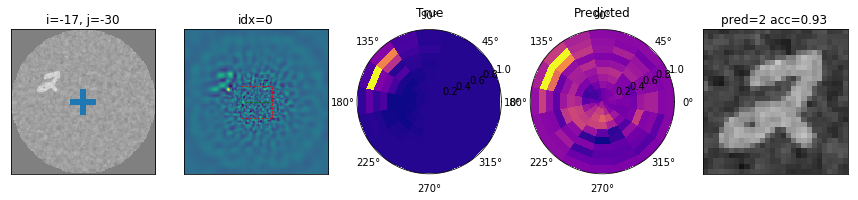

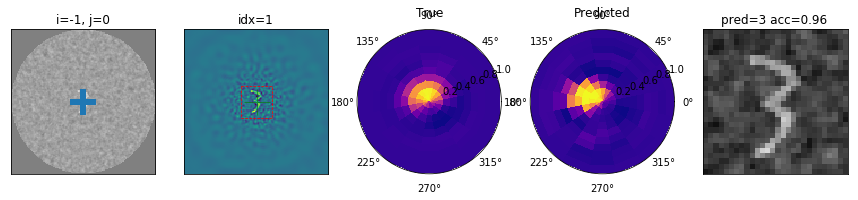

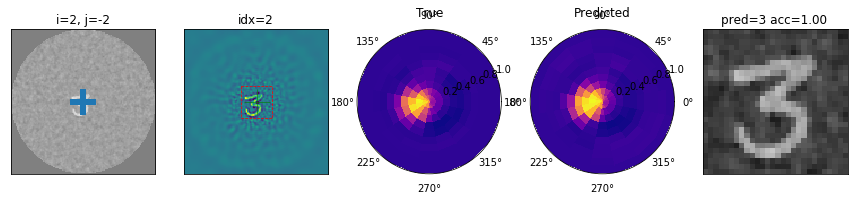

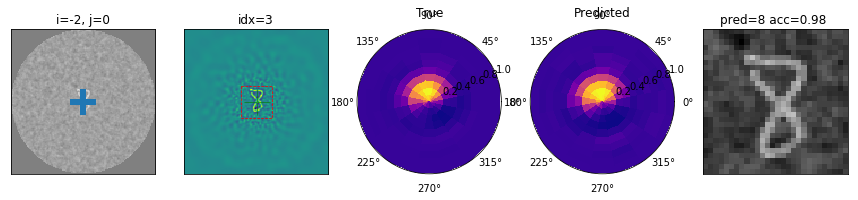

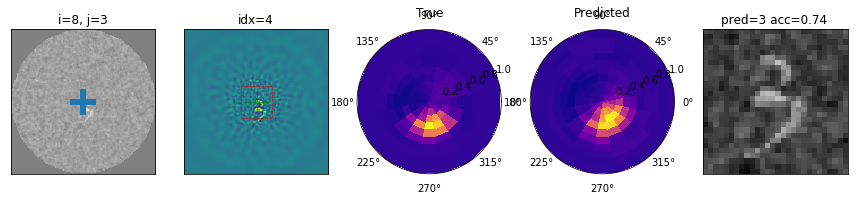

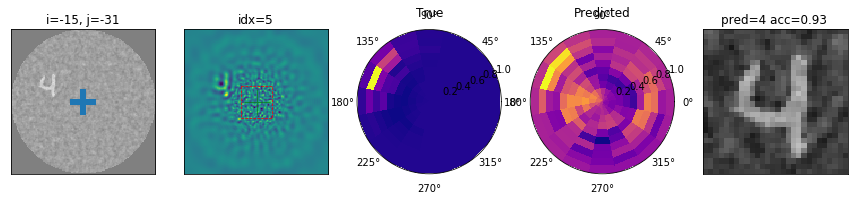

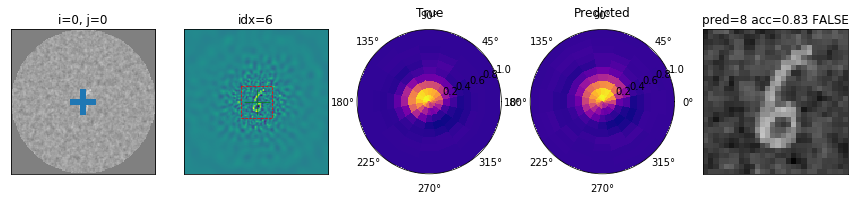

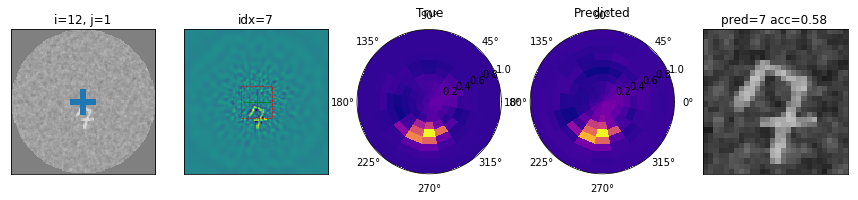

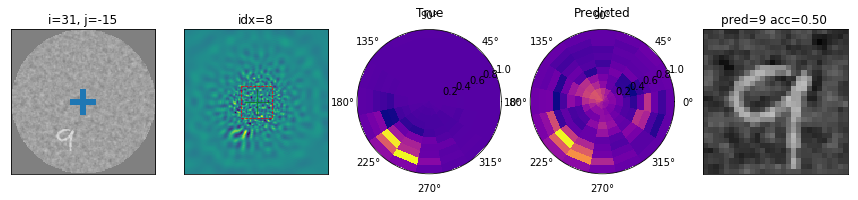

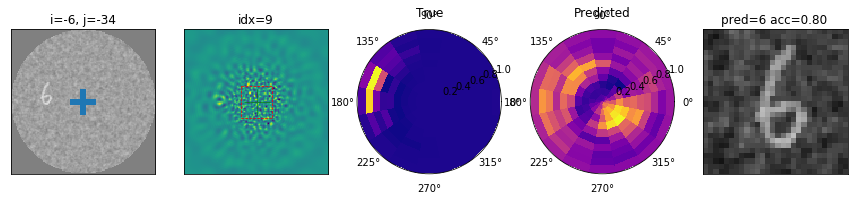

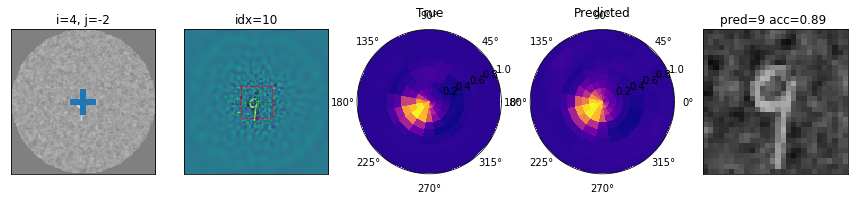

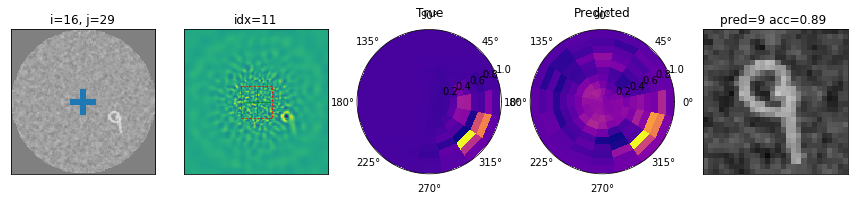

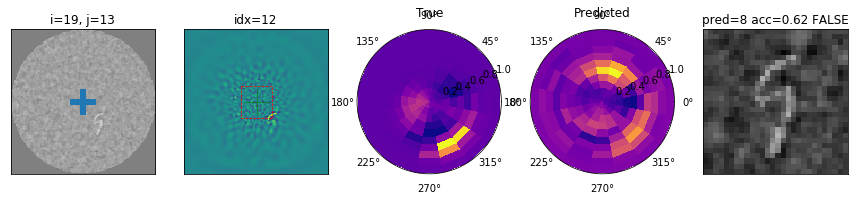

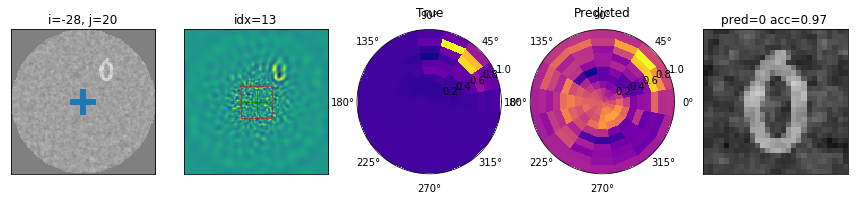

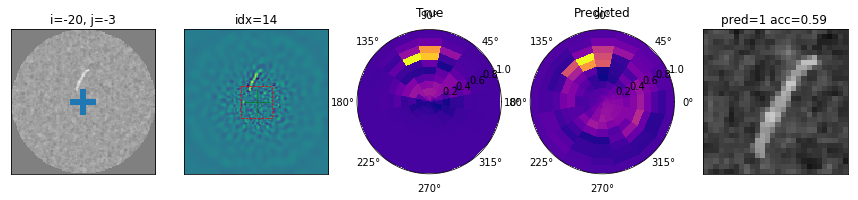

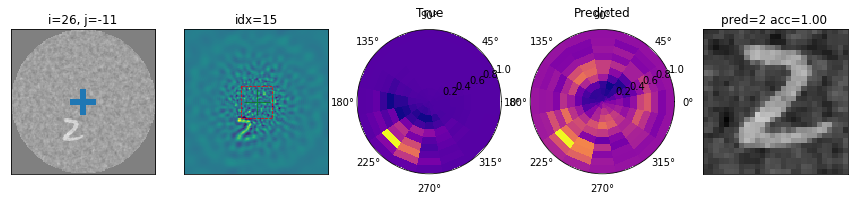

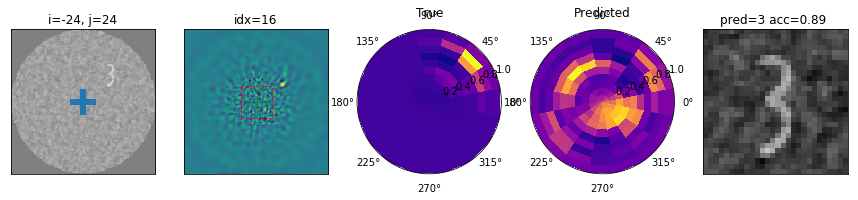

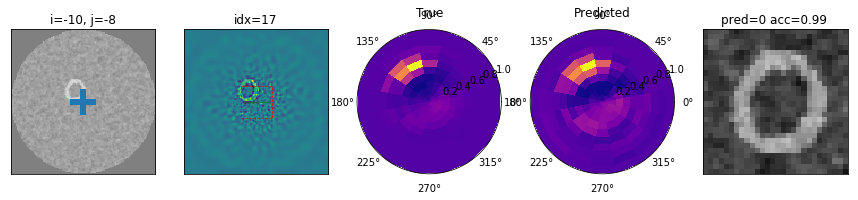

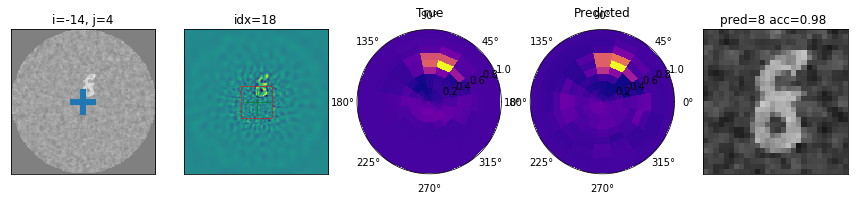

In [18]:
#for idx in range(args.test_batch_size): #range(3, 7):
for idx in range(idx_start, idx_stop):
    fig = plt.figure(figsize = (15, 8))
    
    ax = fig.add_subplot(151)
    ax = d.show(ax, full[idx]['data_fullfield'])
    ax.set_title(f"i={full[idx]['i_offset']}, j={full[idx]['j_offset']}")
    
    ax = fig.add_subplot(152)
    #ax = r.show(ax, r.retina_invert(retina_data[idx, :].numpy()))
    data_retina = r.retina(full[idx]['data_fullfield'])
    ax = r.show(ax, r.retina_invert(data_retina))
    ax.set_title(f"idx={idx}")
              
    ax = fig.add_subplot(153, projection='polar')
    ax.pcolor(r.theta, r.log_r, accuracy_colliculus[idx, :].numpy().reshape((args.N_azimuth, args.N_eccentricity)), cmap=plt.plasma())
    ax.set_title("True")

    ax = fig.add_subplot(154, projection='polar')
    ax.pcolor(r.theta, r.log_r, pred_accuracy_colliculus[idx, :].reshape((args.N_azimuth, args.N_eccentricity)), cmap=plt.plasma())
    ax.set_title("Predicted")

    ax = fig.add_subplot(155)
    ax = d.show(ax, im[idx, :, :], do_cross=False)
    result = '' if pred[idx]==label[idx].numpy() else 'FALSE'
    ax.set_title(f"pred={pred[idx]} acc={proba[idx,pred[idx]]:.2f} {result}")
                 

## NOT knowing the target

In [19]:

pred_accuracy_colliculus = F.sigmoid(where.model(retina_data)).detach().numpy()
    
pred_accuracy_colliculus.shape

(20, 160)

In [20]:
%prun r.accuracy_invert(pred_accuracy_colliculus[idx, :])

         5 function calls in 0.001 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.001    0.001    0.001    0.001 retina.py:71(accuracy_invert)
        1    0.000    0.000    0.001    0.001 {built-in method builtins.exec}
        1    0.000    0.000    0.001    0.001 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {method 'reshape' of 'numpy.ndarray' objects}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}

In [21]:
r.accuracy_invert(pred_accuracy_colliculus[idx, :]).shape, pred_accuracy_colliculus[idx, :].shape

((128, 128), (160,))

In [22]:
x = r.accuracy_invert(pred_accuracy_colliculus[idx, :])

In [23]:
x.shape

(128, 128)

In [24]:
np.unravel_index(np.argmax(x.ravel()), x.shape)

(50, 67)

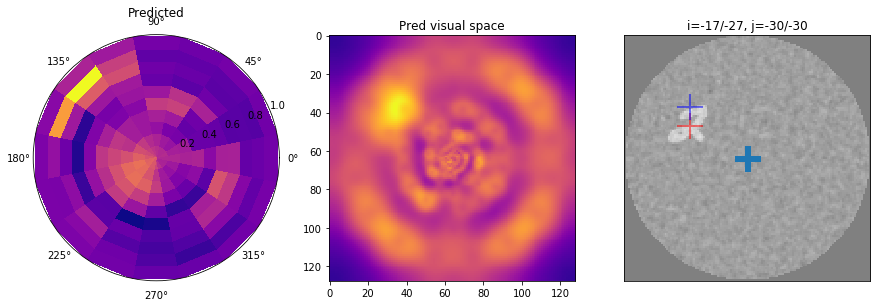

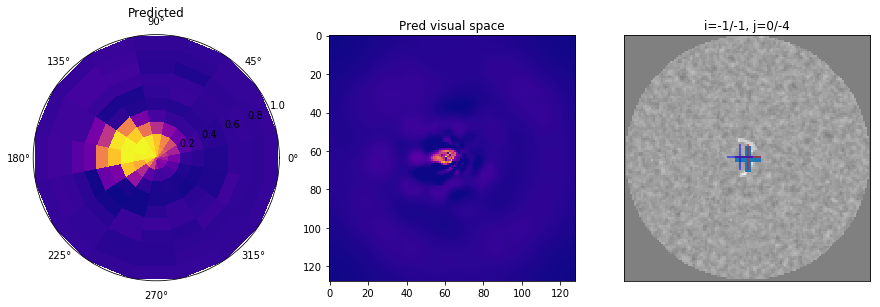

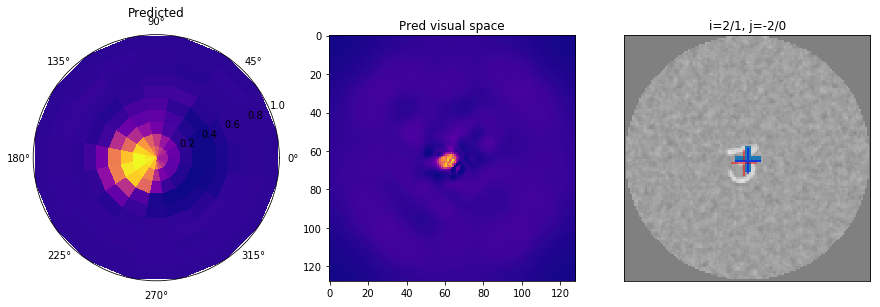

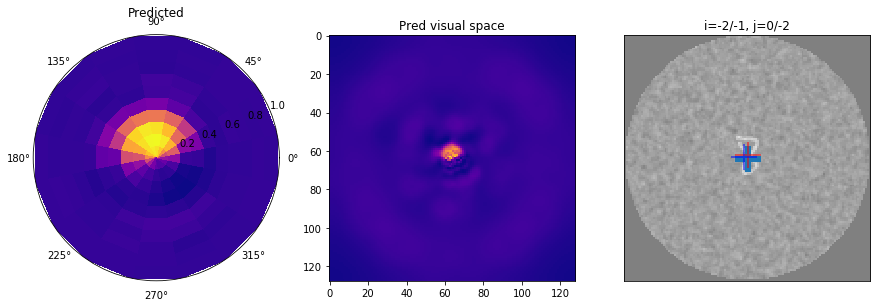

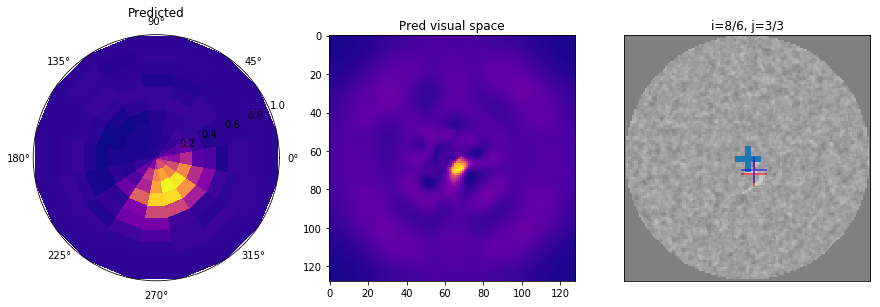

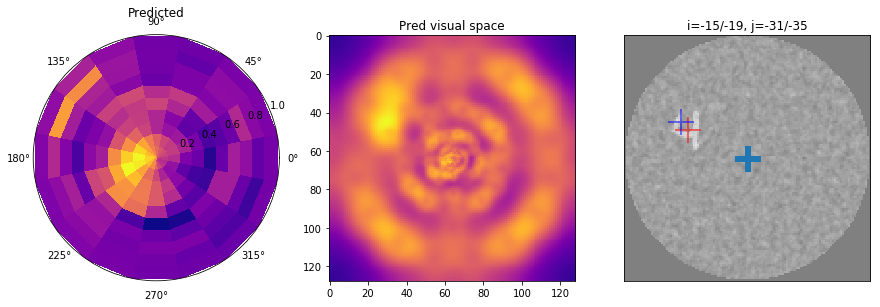

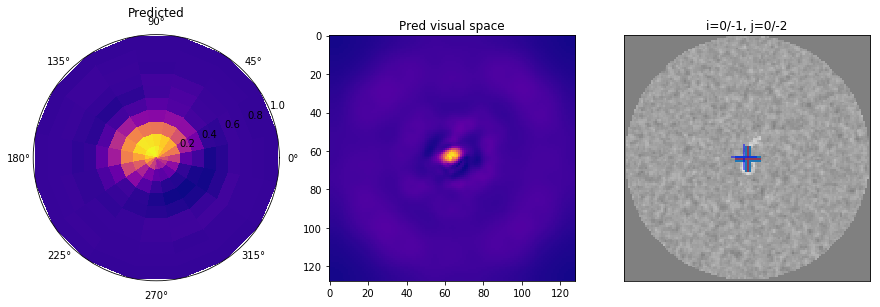

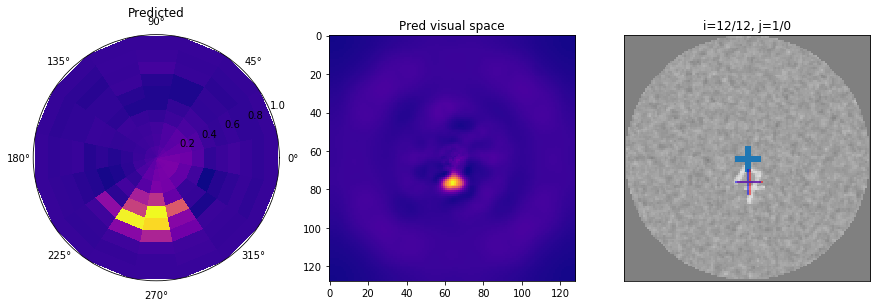

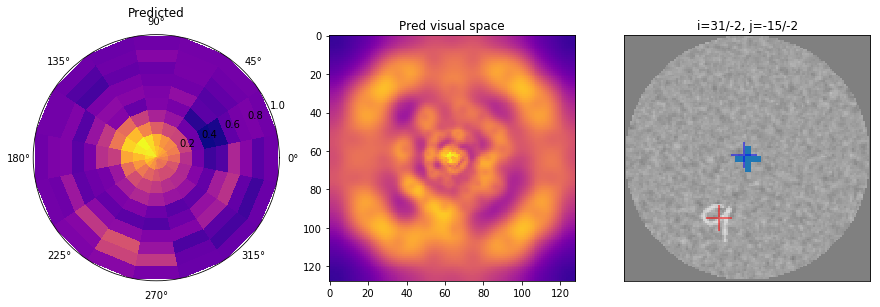

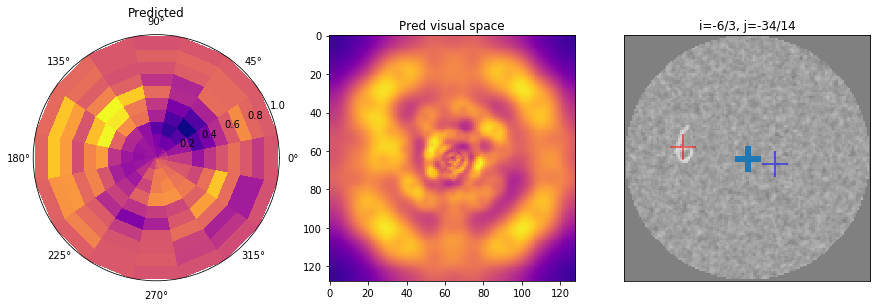

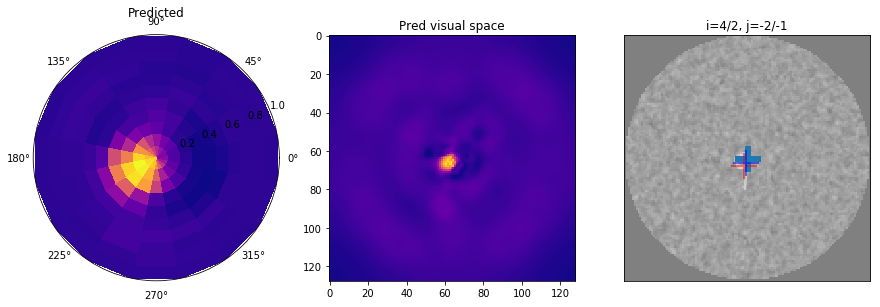

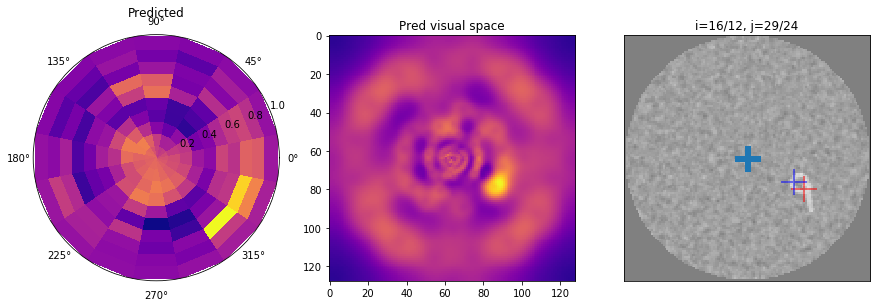

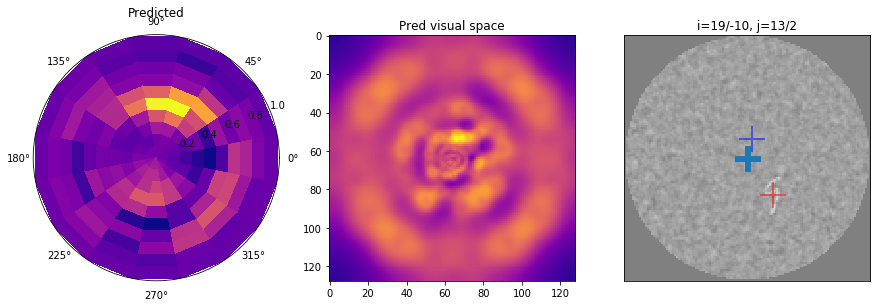

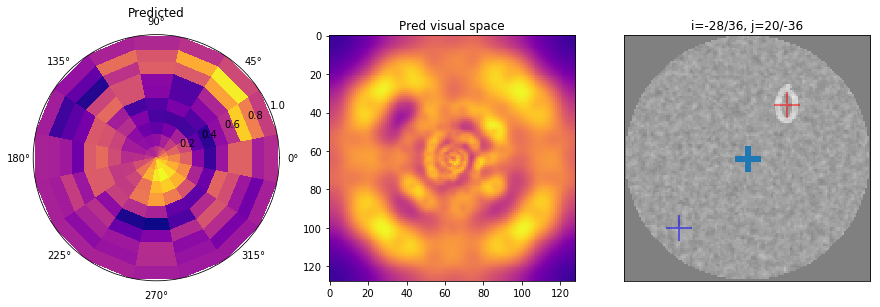

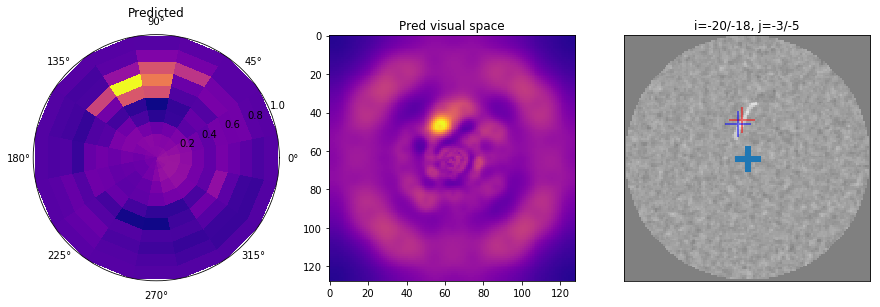

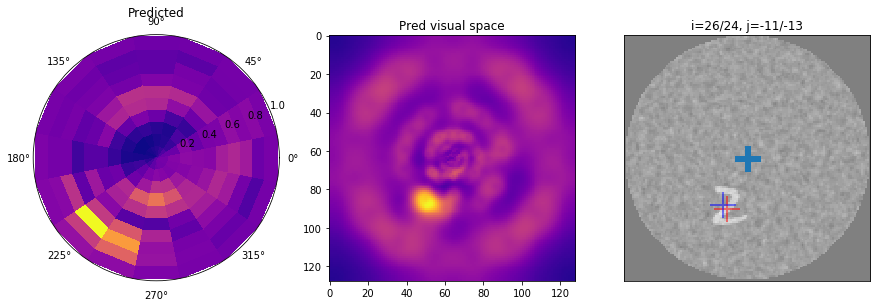

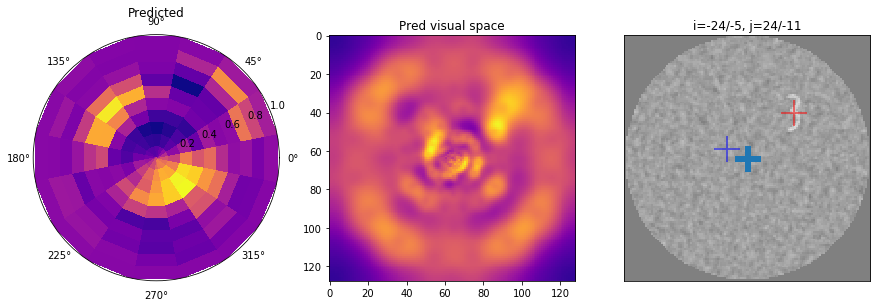

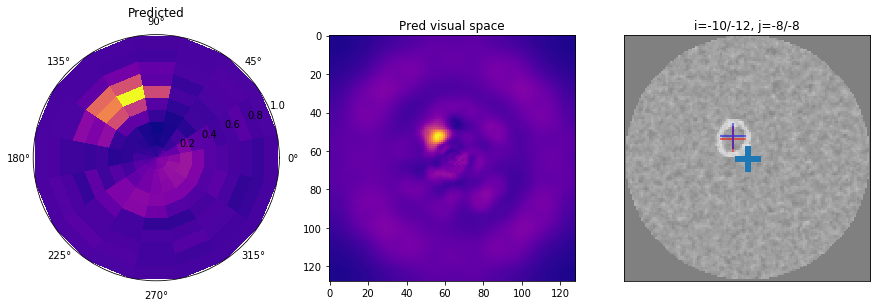

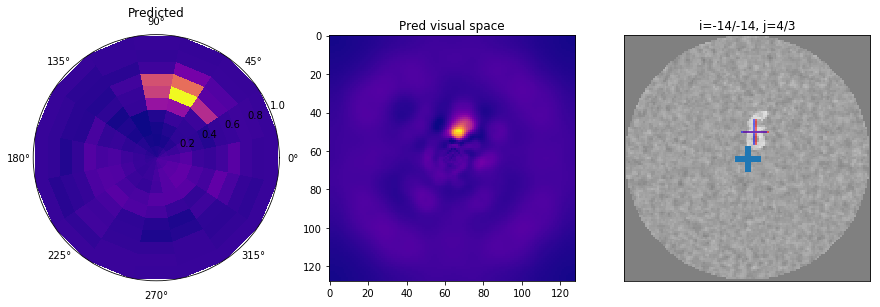

In [25]:
#for idx in range(args.test_batch_size): #range(3, 7):
for idx in range(idx_start, idx_stop):
    fig = plt.figure(figsize = (15, 8))

    ax = fig.add_subplot(131, projection='polar')
    ax.pcolor(r.theta, r.log_r, pred_accuracy_colliculus[idx, :].reshape((args.N_azimuth, args.N_eccentricity)), cmap=plt.plasma())
    ax.set_title("Predicted")
              
    x = r.accuracy_invert(pred_accuracy_colliculus[idx, :])
    ax = fig.add_subplot(132)
    ax.imshow(x, vmin=0, cmap=plt.plasma())
    ax.set_title("Pred visual space")
    
    i, j = np.unravel_index(np.argmax(x.ravel()), x.shape)
    i_pred = i - args.N_pic//2
    j_pred = j - args.N_pic//2
    ax = fig.add_subplot(133)
    ax = d.show(ax, full[idx]['data_fullfield'])
    ax.set_title(f"i={full[idx]['i_offset']}/{i_pred}, j={full[idx]['j_offset']}/{j_pred}")
    ax.plot([full[idx]['j_offset']+args.N_pic//2], [full[idx]['i_offset']+args.N_pic//2], '+', c='r', ms=26, markeredgewidth=2, alpha=.5)
    ax.plot([j], [i], '+', c='b', ms=26, markeredgewidth=2, alpha=.5)
    
    

In [26]:
im = np.zeros((args.test_batch_size, args.w, args.w))
for idx in range(args.test_batch_size):
    x = r.accuracy_invert(pred_accuracy_colliculus[idx, :])    
    i, j = np.unravel_index(np.argmax(x.ravel()), x.shape)
    i_pred = i - args.N_pic//2
    j_pred = j - args.N_pic//2
    im[idx, :, :] = where.extract(full[idx]['data_fullfield'], i_pred, j_pred)
proba = where.classify_what(im).numpy()
print(proba.shape)
pred = proba.argmax(axis=1) # get the index of the max log-probability
print(pred.shape)
acc = proba[:, pred]
print((pred==label.numpy()).mean())

(20, 10)
(20,)
0.55


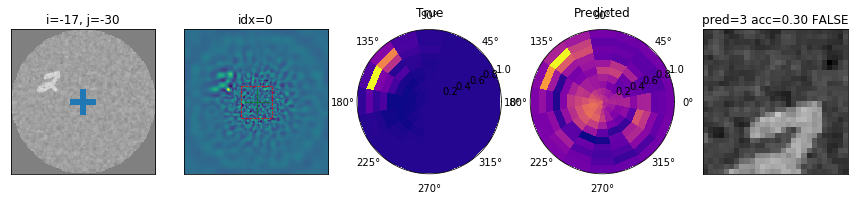

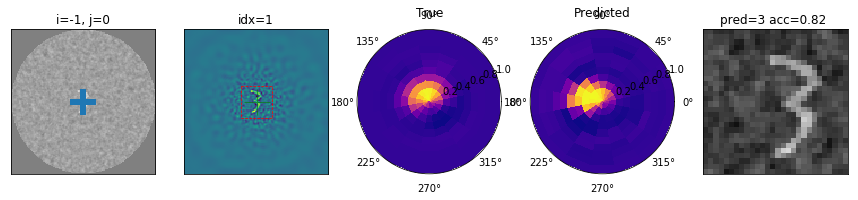

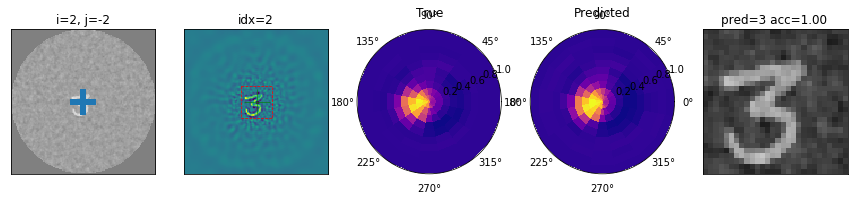

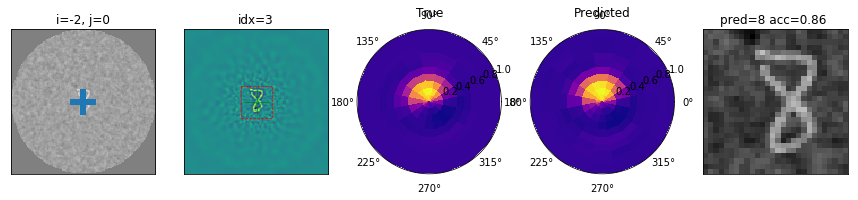

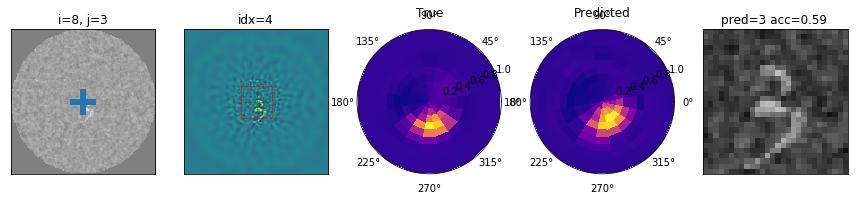

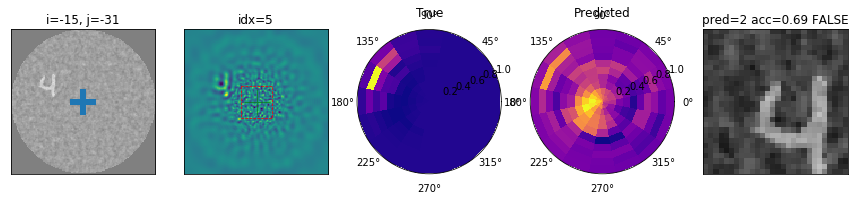

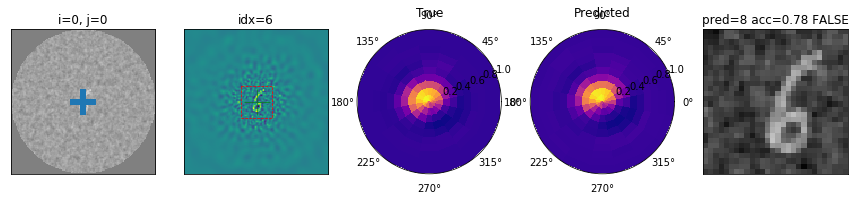

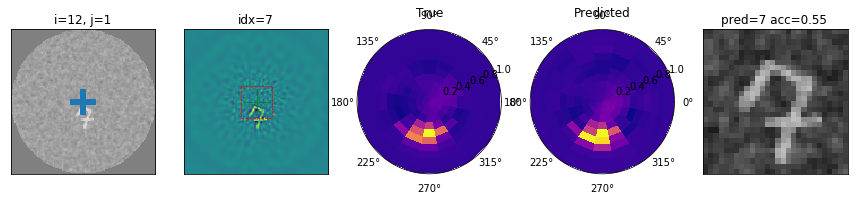

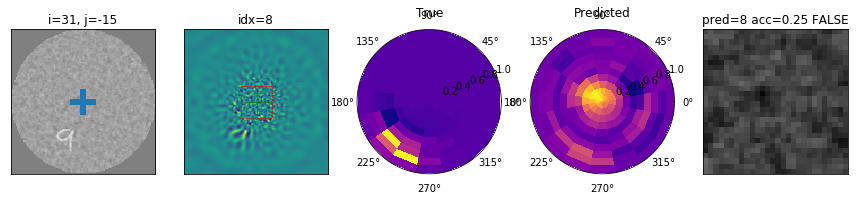

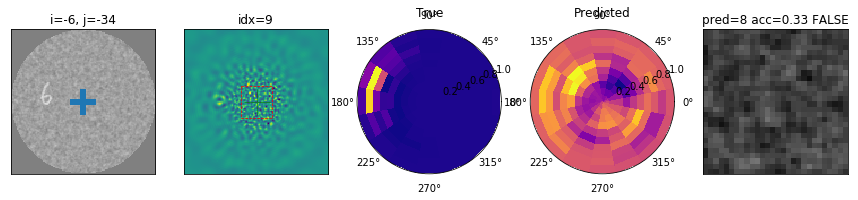

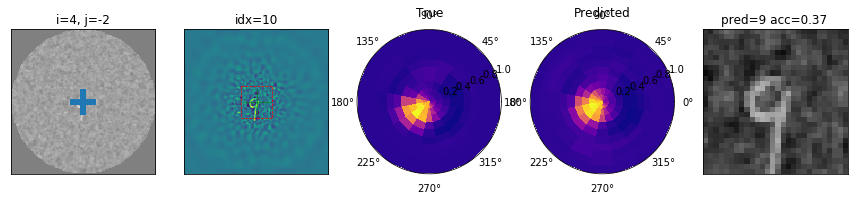

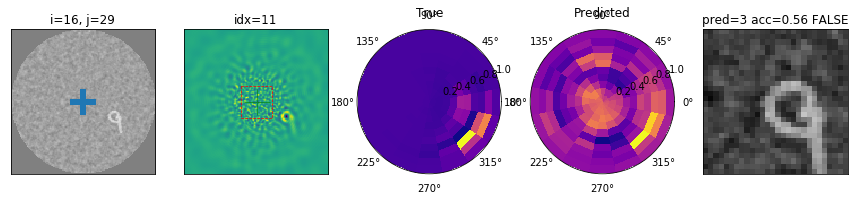

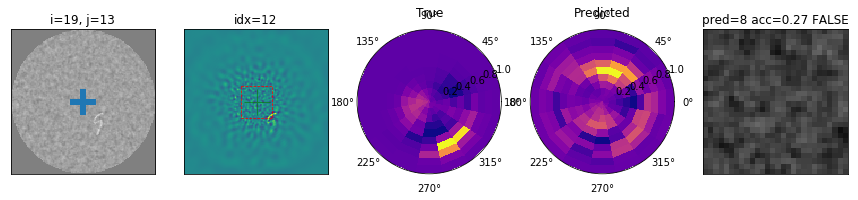

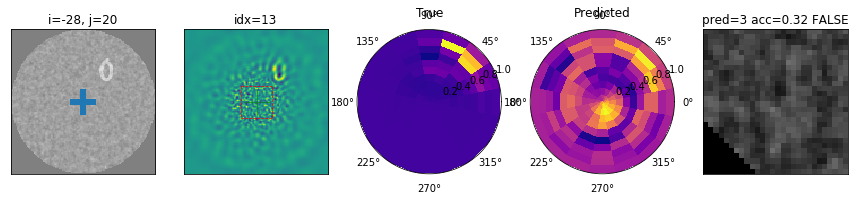

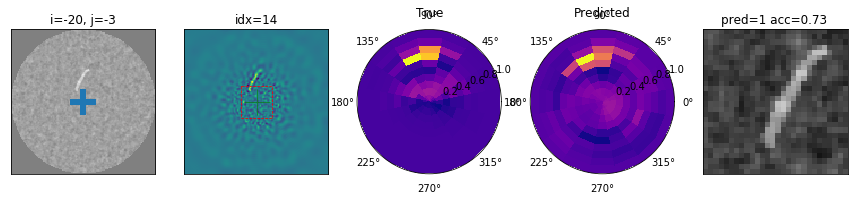

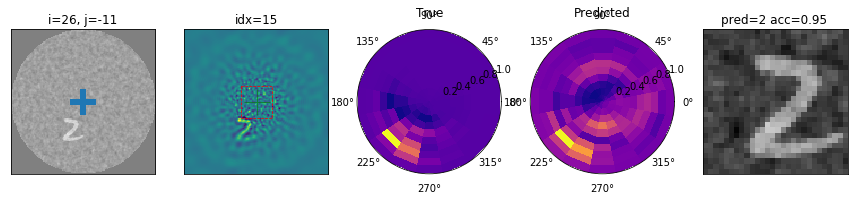

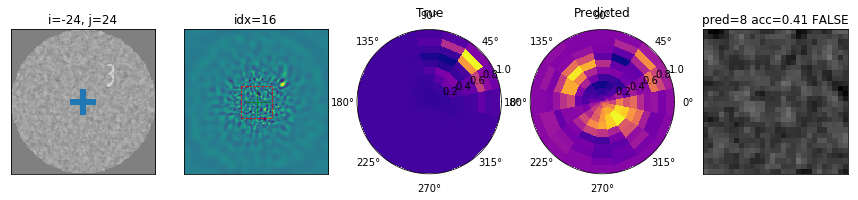

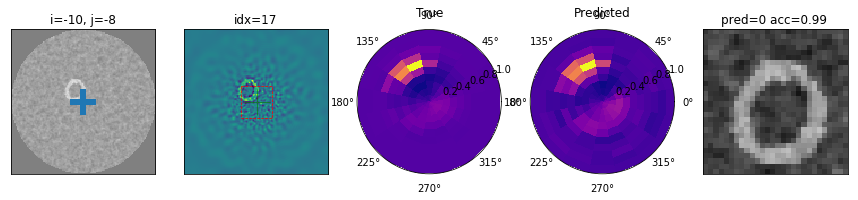

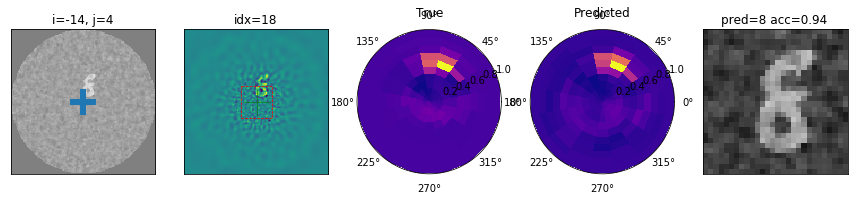

In [27]:
#for idx in range(args.test_batch_size): #range(3, 7):
for idx in range(idx_start, idx_stop):
    fig = plt.figure(figsize = (15, 8))
    
    ax = fig.add_subplot(151)
    ax = d.show(ax, full[idx]['data_fullfield'])
    ax.set_title(f"i={full[idx]['i_offset']}, j={full[idx]['j_offset']}")
    
    ax = fig.add_subplot(152)
    #ax = r.show(ax, r.retina_invert(retina_data[idx, :].numpy()))
    data_retina = r.retina(full[idx]['data_fullfield'])
    ax = r.show(ax, r.retina_invert(data_retina))
    ax.set_title(f"idx={idx}")
              
    ax = fig.add_subplot(153, projection='polar')
    ax.pcolor(r.theta, r.log_r, accuracy_colliculus[idx, :].numpy().reshape((args.N_azimuth, args.N_eccentricity)), cmap=plt.plasma())
    ax.set_title("True")

    ax = fig.add_subplot(154, projection='polar')
    ax.pcolor(r.theta, r.log_r, pred_accuracy_colliculus[idx, :].reshape((args.N_azimuth, args.N_eccentricity)), cmap=plt.plasma())
    ax.set_title("Predicted")

    ax = fig.add_subplot(155)
    ax = d.show(ax, im[idx, :, :], do_cross=False)
    result = '' if pred[idx]==label[idx].numpy() else 'FALSE'
    ax.set_title(f"pred={pred[idx]} acc={proba[idx,pred[idx]]:.2f} {result}")
                 

on the batch

In [28]:
where.test_what(full, pred_accuracy_colliculus, label)

0.55

testing on the test set:

In [29]:
where.test()

0.5091

# accuracy as a function of eccentricity


In [30]:
def test_eccentricities(N_eccentricities=9, ecc_max=.8):
     
    eccentricities = args.N_pic / 2 * ecc_max * (1/args.rho)**(args.N_eccentricity - np.arange(N_eccentricities))
    accuracy_data = []

    for eccentricity in eccentricities:
        data, label = next(iter(d.loader_test))

        batch_size = data.shape[0]
        retina_data = np.zeros((batch_size, where.retina.vsize))
        accuracy_colliculus = np.zeros((batch_size, where.args.N_azimuth * where.args.N_eccentricity))
        full =[]

        for i in range(batch_size):
            data_fullfield, i_offset, j_offset = where.display.draw(data[i, 0, :, :].numpy())
            full.append(dict(data_fullfield=data_fullfield, i_offset=i_offset, j_offset=j_offset))
            retina_data[i, :]  =  where.retina.retina(data_fullfield)

        retina_data = Variable(torch.FloatTensor(retina_data))

        pred_accuracy_colliculus = F.sigmoid(where.model(retina_data)).detach().numpy()

        accuracy_data.append(where.test_what(full, pred_accuracy_colliculus, label).mean())
        
    return eccentricities, np.array(accuracy_data)

N_eccentricities = 9
eccentricities, accuracy_data = test_eccentricities(N_eccentricities)
print('eccentricities=', eccentricities, ', accuracy_data=', accuracy_data)

eccentricities= [ 1.6484616   2.32433085  3.2773065   4.62100217  6.51561306  9.18701441
 12.95369032 18.26470335 25.75323173] , accuracy_data= [0.55 0.7  0.7  0.5  0.5  0.55 0.5  0.5  0.5 ]


[ 1.6484616   2.32433085  3.2773065   4.62100217  6.51561306  9.18701441
 12.95369032 18.26470335 25.75323173]


(0, 1)

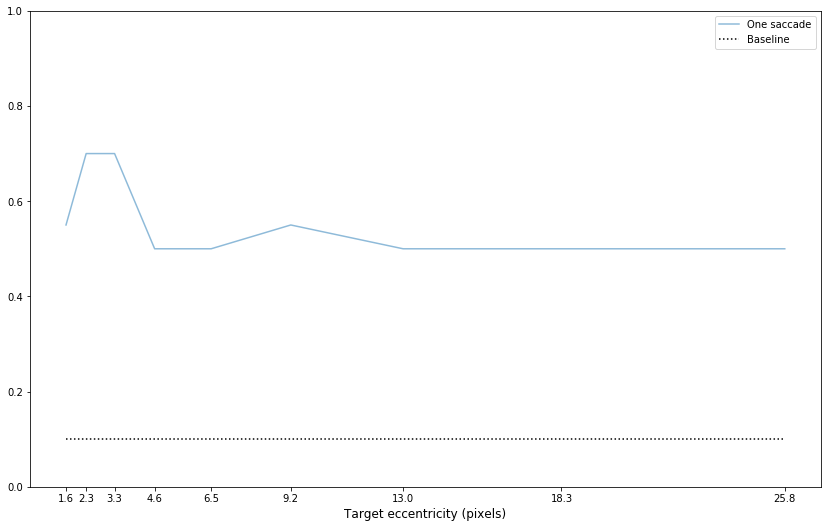

In [31]:
fig = plt.figure(figsize = (figwidth, figwidth/1.618))
ax_D = fig.add_subplot(1, 1, 1)
print(eccentricities)
ax_D.plot(eccentricities, accuracy_data, alpha = .5, label = 'One saccade')
# TODO what instead? ax_D.bar(eccentricities, accuracy_data, alpha = .5, label = 'No saccade') #accuracy_map[27,27:55])
ax_D.plot(eccentricities, [0.1]*len(eccentricities), ':', c='k', label = 'Baseline')
plt.legend(loc='best')
#ax_D.set_title('Class accuracy', fontsize = 14)
ax_D.set_xlabel('Target eccentricity (pixels)', fontsize = 12)
ax_D.set_xticks(eccentricities)
ax_D.set_xticklabels(['%.1f' % d for  d in eccentricities])
ax_D.set_ylim([0,1])




# summary


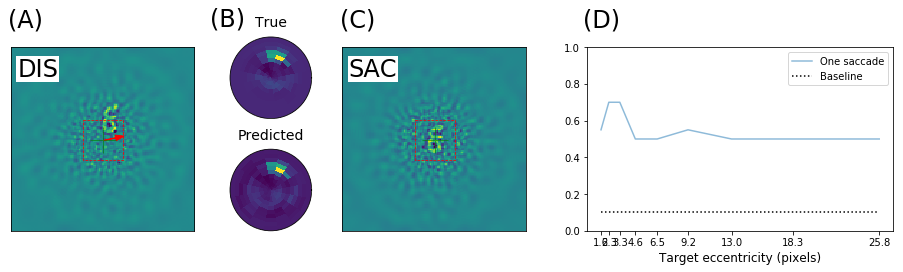

In [32]:
fig = plt.figure(figsize = (figwidth, figwidth/2.5))#1.618))
ax_A = plt.subplot(1, 4, 1) 
data_retina = r.retina(full[idx]['data_fullfield'])
ax_A = where.retina.show(ax_A, r.retina_invert(data_retina))
    
ax_B = plt.subplot(2, 4, 2, projection='polar', autoscale_on=False)
ax_B.pcolor(r.theta, r.log_r, accuracy_colliculus[idx, :].numpy().reshape((args.N_azimuth, args.N_eccentricity)))
ax_B.grid('off')
plt.title('True', fontsize = 14)
ax_B.set_yticklabels([])
ax_B.set_xticklabels([])

ax_Bb = plt.subplot(2, 4, 6, projection='polar')
ax_Bb.pcolor(r.theta, r.log_r, pred_accuracy_colliculus[idx, :].reshape((args.N_azimuth, args.N_eccentricity)))
ax_Bb.set_title('Predicted', fontsize = 14)
ax_Bb.set_yticklabels([])
ax_Bb.set_xticklabels([])


ax_C = plt.subplot(1, 4, 3)
data_fullfield = d.place_object(data[idx, 0, :, :].numpy(), 0, 0)
input_vector  =  r.retina(data_fullfield)
ax_C = r.show(ax_C, r.retina_invert(input_vector))
i_pred, j_pred = where.index_prediction(pred_accuracy_colliculus[idx, :])
ax_A.arrow(64.5, 64.5, -i_pred, -j_pred, width=.3, color='r', head_width=4., length_includes_head=True, edgecolor='k')

ax_D = plt.subplot(1, 4, 4)
ax_D.plot(eccentricities, accuracy_data, alpha = .5, label = 'One saccade')
ax_D.plot(eccentricities, [0.1]*len(eccentricities), ':', c='k', label = 'Baseline')
plt.legend(loc='best')
ax_D.set_xlabel('Target eccentricity (pixels)', fontsize = 12)
ax_D.set_xticks(eccentricities)
ax_D.set_xticklabels(['%.1f' % d for  d in eccentricities])
ax_D.set_ylim([0,1])

for ax, text in [[ax_A, 'DIS'], [ax_C, 'SAC']]:
    ax.text(4, 15, text, fontsize=24,
          bbox={'facecolor':'white','alpha':1,'edgecolor':'none','pad':1},
          ha='left', va='center') 

offset = -.015
for ax, text, x_offset, y_offset in [[ax_A, 'A', offset, 1.15], [ax_B, 'B', -.25, 1.225], [ax_C, 'C', offset, 1.15], [ax_D, 'D', offset, 1.15]]:
    ax.text(x_offset, y_offset, '(' + text + ')', fontsize=24,
              bbox={'facecolor':'white','alpha':1,'edgecolor':'none','pad':1},
              ha='left', va='center', transform=ax.transAxes) 

# pos : [left, bottom, width, height] =    The new position of the in `.Figure` coordinates.    
plt.tight_layout()
ax_A.set_position([0.025, 0.1, .3, .45])
ax_B.set_position( [0.24, 0.375, .2, 0.2])
ax_Bb.set_position([0.24, 0.1, .2, 0.2])
ax_C.set_position([0.35, .1, .3, .45])
ax_D.set_position([0.65, .1, .3, .45])
fig.savefig(figname + '.pdf', bbox_inches='tight', pad_inches=0.1)

# post-processing

In [33]:
!convert  -density {dpi_export} {figname}.pdf {figname}.jpg
!convert  -density {dpi_export} {figname}.pdf {figname}.png
#!convert  -density {dpi_export} -resize 5400  -units pixelsperinch -flatten  -compress lzw  -depth 8 {fname}.pdf {fname}.tiff

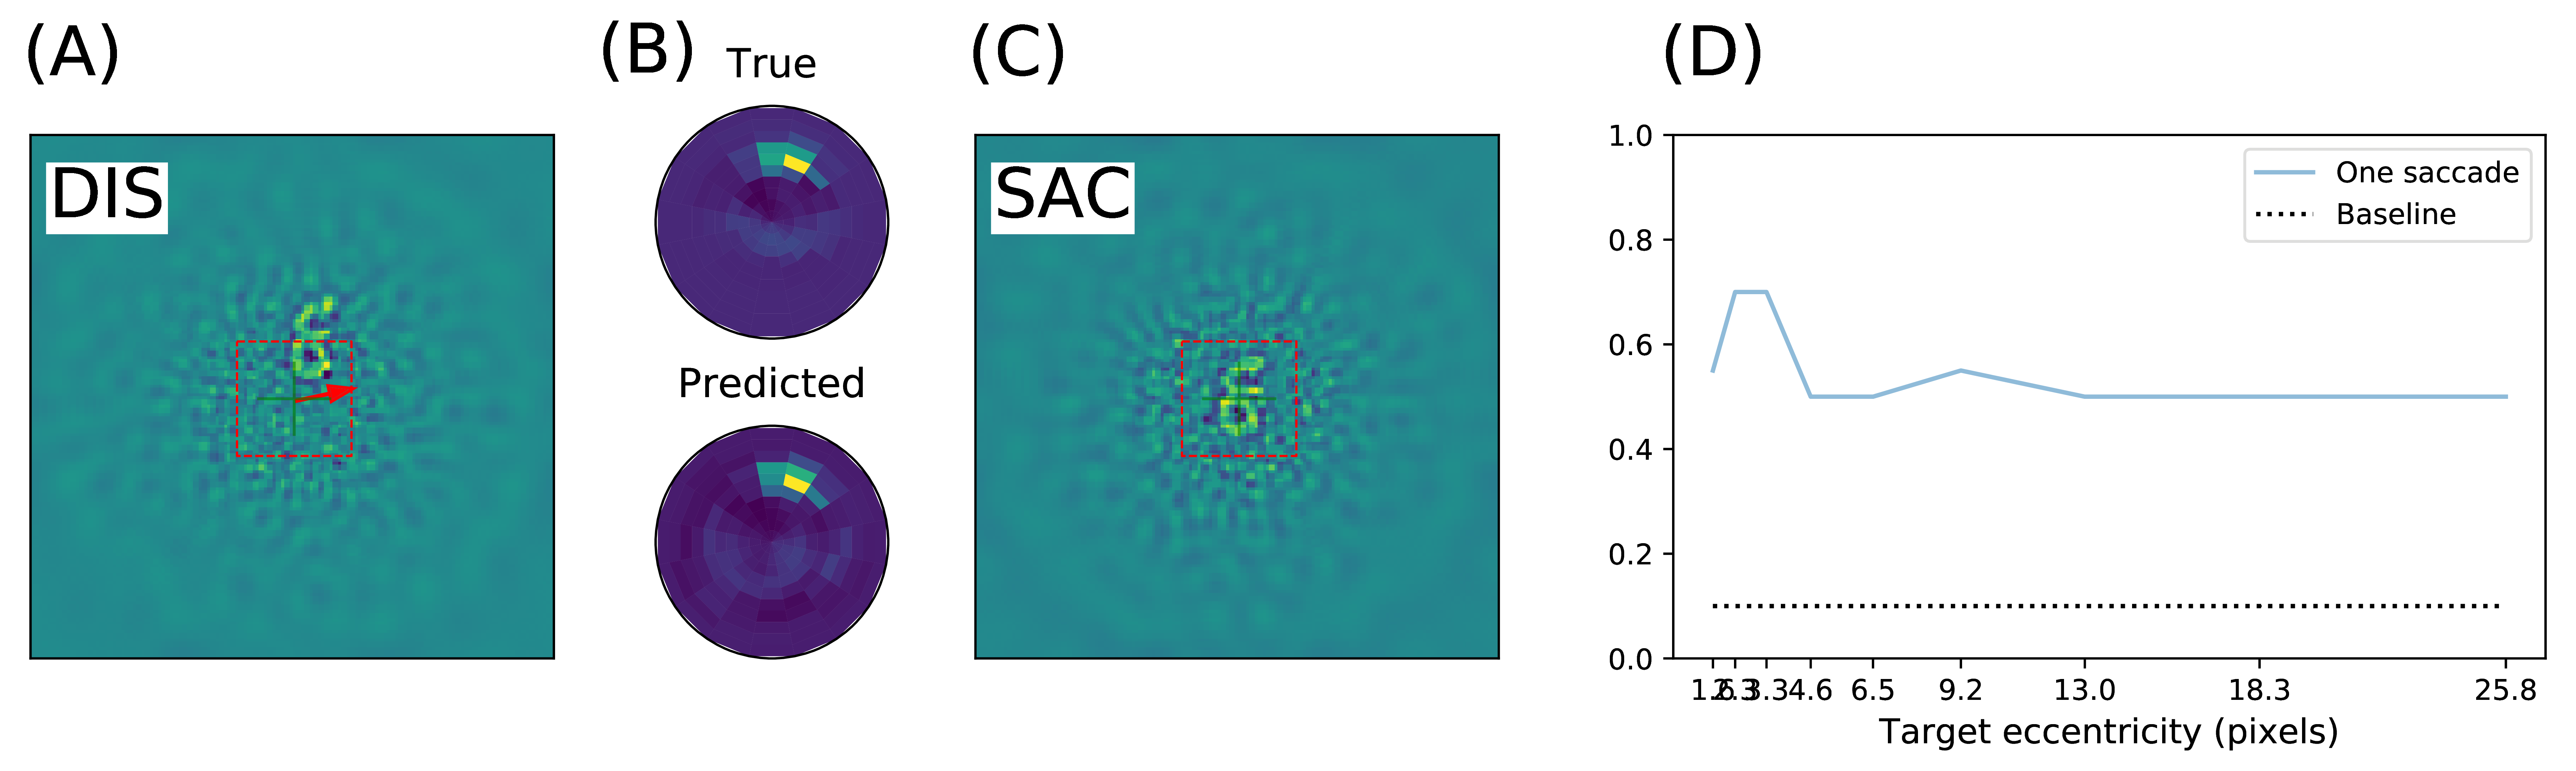

In [34]:
from IPython.display import Image
Image('{figname}.png'.format(figname=figname))

In [35]:
!ls  -l {figname}*

-rw-r--r--  1 laurentperrinet  staff  1050335 Mar 15 12:14 ../paper/fig_result.jpg
-rw-r--r--@ 1 laurentperrinet  staff    67427 Mar 15 12:14 ../paper/fig_result.pdf
-rw-r--r--  1 laurentperrinet  staff   417418 Mar 15 12:14 ../paper/fig_result.png


## Version used

In [36]:
%load_ext version_information
%version_information numpy, shl_scripts

Software versions
Python 3.7.2 64bit [Clang 10.0.0 (clang-1000.11.45.5)]
IPython 7.3.0
OS Darwin 18.2.0 x86_64 i386 64bit
numpy 1.16.2
shl_scripts 20171221
Fri Mar 15 12:14:14 2019 CET